### what is an Outlier?

http://odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/

In statistics, an outlier is an observation or data point that differs significantly from other observations or data points in a dataset. Outliers can be caused by a variety of factors, including measurement error, data entry errors, or genuine differences in the data being measured.

Outliers can have a significant impact on statistical analyses, such as measures of central tendency (e.g., mean, median) and measures of variability (e.g., standard deviation). As a result, it's important to identify and handle outliers appropriately in order to ensure accurate and reliable statistical results.

There are various methods to identify outliers, including graphical methods such as box plots and scatter plots, as well as statistical __methods such as the Z-score and Tukey's method__. Once outliers are identified, they can be either removed from the dataset or handled in some other way, depending on the specific situation and goals of the analysis.

https://people.duke.edu/~ccc14/bios-823-2018/S10_Anomaly_Detection.html#Confusion-matrix

https://github.com/yzhao062/pyod

In [36]:
# import the libraries
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
# Load the MATLAB file
mat = scipy.io.loadmat('cardio.mat')

# Check the available keys in the mat object
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [31]:
# chech the data tha are stored in this file
# Load the data from the "cardio.mat" file
mat = scipy.io.loadmat('cardio.mat')

# Extract the data and labels arrays from the loaded data
X = mat['X']
y = mat['y']

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(X)

# Loop through the columns of the DataFrame and display the data
for col in df.columns:
    print(f"Column {col}:")
    print(df[col])
    print()


Column 0:
0       0.004912
1       0.110729
2       0.216546
3       0.004912
4      -0.100905
          ...   
1826   -0.418356
1827   -0.418356
1828   -0.418356
1829   -0.418356
1830   -0.418356
Name: 0, Length: 1831, dtype: float64

Column 1:
0       0.693191
1      -0.079903
2      -0.272445
3       0.727346
4       0.363595
          ...   
1826   -0.919988
1827   -0.919988
1828   -0.919988
1829   -0.919988
1830   -0.919988
Name: 1, Length: 1831, dtype: float64

Column 2:
0      -0.203640
1      -0.203640
2      -0.203640
3      -0.203640
4       1.321366
          ...   
1826   -0.161178
1827   -0.171055
1828   -0.164635
1829   -0.150934
1830   -0.203640
Name: 2, Length: 1831, dtype: float64

Column 3:
0       0.595322
1       1.268942
2       1.050988
3       1.212171
4       1.027120
          ...   
1826    0.829564
1827    0.796630
1828    0.952396
1829    0.695726
1830    1.173282
Name: 3, Length: 1831, dtype: float64

Column 4:
0       0.353190
1       0.396246
2       0.14

In [35]:
# convert the data into pandas dataframe
# Load the mat file
mat = scipy.io.loadmat('cardio.mat')

# Extract the X and y data
X = mat['X']
y = mat['y']

# Create a Pandas DataFrame for the data
df = pd.DataFrame(
    data=X, 
    columns=[f'feat_{i}' 
    for i in range(X.shape[1])]
    )

df['label'] = y.ravel()

# Print the first 5 rows of the DataFrame
print(df.head())


     feat_0    feat_1    feat_2    feat_3    feat_4    feat_5    feat_6  \
0  0.004912  0.693191 -0.203640  0.595322  0.353190 -0.061401 -0.278295   
1  0.110729 -0.079903 -0.203640  1.268942  0.396246 -0.061401 -0.278295   
2  0.216546 -0.272445 -0.203640  1.050988  0.148753 -0.061401 -0.278295   
3  0.004912  0.727346 -0.203640  1.212171 -0.683598 -0.061401 -0.278295   
4 -0.100905  0.363595  1.321366  1.027120  0.141359 -0.061401 -0.278295   

     feat_7    feat_8    feat_9  ...   feat_12   feat_13   feat_14   feat_15  \
0 -1.650444  0.759072 -0.420487  ... -0.798376  1.854728  0.622631  0.963083   
1 -1.710270  0.759072 -0.420487  ... -0.798376  1.854728  0.278625  0.963083   
2 -1.710270  1.106509 -0.420487  ... -1.332931  0.314688  2.342663 -0.488279   
3 -1.710270  1.106509 -0.420487  ... -1.332931  0.314688  1.654650 -0.488279   
4 -0.992364 -0.051613 -0.420487  ... -0.085638 -0.565334  0.278625 -0.488279   

    feat_16   feat_17   feat_18   feat_19   feat_20  label  
0  0.30

### Detect the outliers

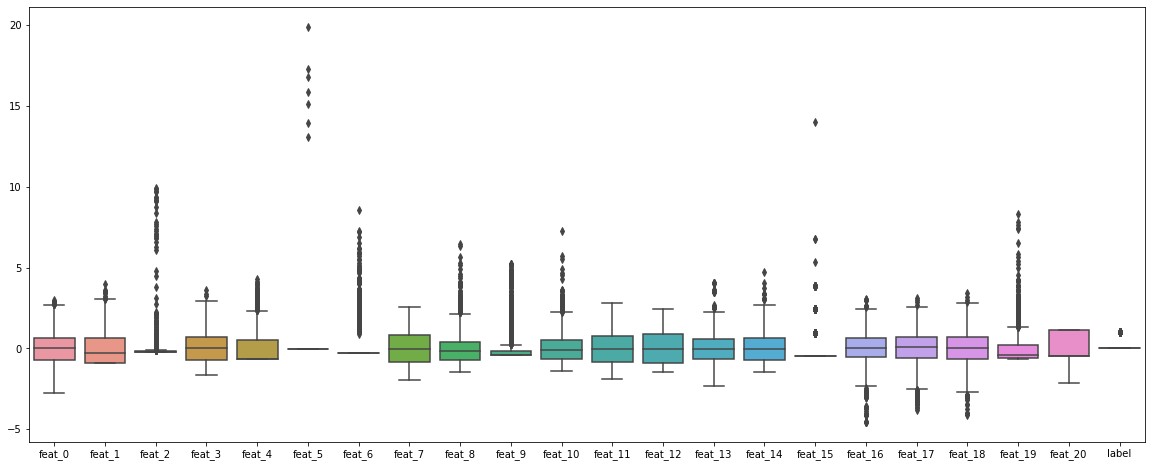

In [52]:
# outliers with BoxPlot
# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

# create a bigger figure
plt.figure(figsize=(20, 8))

# create a box plot of the data
sns.boxplot(data=df)

# identify the outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)

# print("Outliers:")
# print(df[outliers])


Indices of outliers:
(array([   0,    1,    2, ..., 1830, 1830, 1830], dtype=int64), array([15, 15, 10, ..., 16, 17, 19], dtype=int64))


<AxesSubplot:>

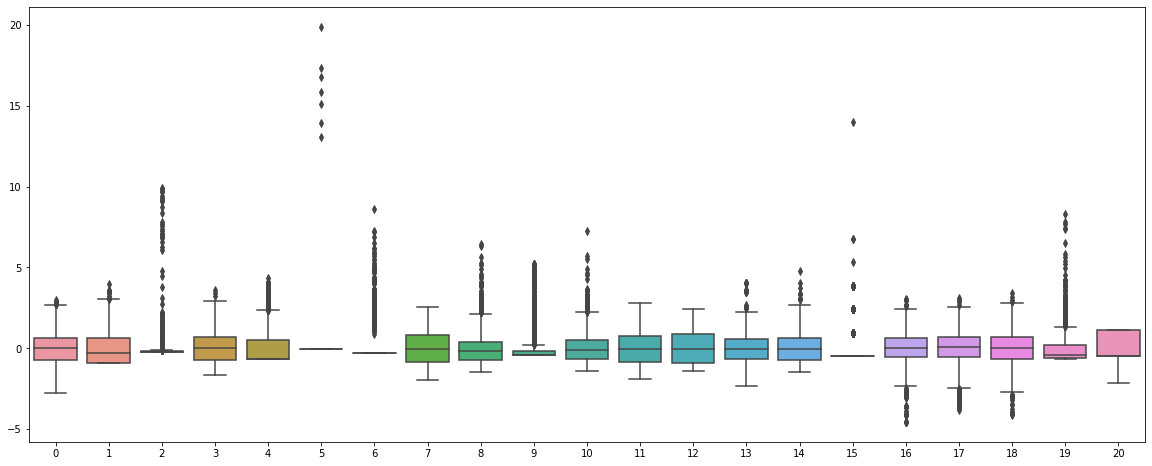

In [57]:
#  Interquartile Range (IQR)

# import the libraries
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

# create a bigger figure
plt.figure(figsize=(20, 8))


# Load the dataset
data = scipy.io.loadmat('cardio.mat')

# Extract the features and target variable
X = data['X']
y = data['y'].ravel()

# Calculate the first and third quartiles
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)

# Calculate the interquartile range
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Find the outliers
outliers = np.where((X < lower_bound) | (X > upper_bound))

# Print the indices of the outliers
print("Indices of outliers:")
print(outliers)

# Plot the boxplot to visualize the distribution of the features
sns.boxplot(data=X)


In [40]:
import numpy as np
import scipy.io

# Load the dataset
data = scipy.io.loadmat('cardio.mat')

# Extract the features and target variable
X = data['X']
y = data['y'].ravel()

# Calculate the mean and standard deviation for each feature
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

# Calculate the Z-scores for each feature
Z = (X - means) / stds

# Find the outliers using a Z-score threshold of 3
outliers = np.where(np.abs(Z) > 3)

# Print the indices of the outliers
print("Indices of outliers:")
print(outliers)


Indices of outliers:
(array([   5,    6,    7,    8,    9,   10,   11,   12,   12,   13,   14,
         14,   16,   26,   27,   28,   29,   29,   30,   31,   34,   56,
         81,   81,   81,   82,   82,   86,   93,   98,   98,   99,   99,
        121,  122,  137,  137,  140,  140,  192,  231,  231,  232,  233,
        233,  235,  235,  235,  236,  254,  255,  255,  270,  279,  281,
        284,  308,  309,  309,  309,  310,  310,  310,  315,  316,  317,
        325,  325,  325,  326,  326,  327,  327,  329,  329,  331,  347,
        347,  348,  348,  381,  383,  385,  390,  392,  393,  398,  407,
        426,  428,  430,  431,  432,  433,  434,  435,  436,  437,  468,
        468,  468,  468,  469,  481,  498,  504,  505,  506,  507,  514,
        528,  590,  613,  616,  632,  639,  640,  731,  747,  764,  765,
        767,  824,  825,  826,  835,  905,  913,  962,  963,  999, 1053,
       1054, 1103, 1104, 1105, 1123, 1196, 1197, 1198, 1202, 1205, 1207,
       1209, 1217, 1226, 1269

<Figure size 432x288 with 0 Axes>

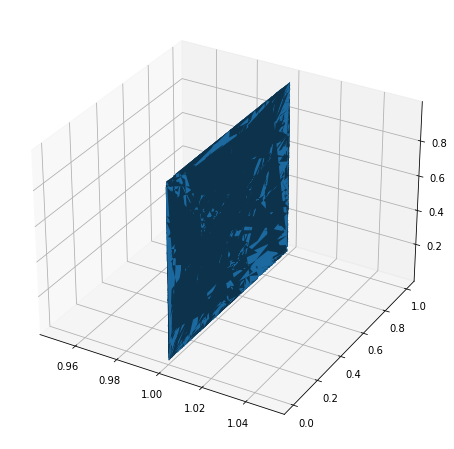

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# assume x and y are defined as 1D arrays
x = np.array([1])
y = Z
# y = np.random.rand(1, 1831, 21) # Z - ????

# reshape x to a 2D array with the same number of rows as y
x_2d = np.tile(x, (y.shape[1], y.shape[2])).reshape(y.shape[1], y.shape[2])

# assume z is also defined
z = np.random.rand(1831, 21)

fig = plt.figure()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_2d, y[0], z)
plt.show()
